## 1. Import Libraries

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
    

## 2. Define Paths

In [4]:

train_path = './data/data_train.csv'
test_path = './data/data_test.csv'

predictions_path_logistic_regression = './data/s4000577_logistic_regression.csv'
predictions_path_decision_tree = './data/s4000577_decision_tree.csv'
predictions_path_random_forest = './data/s4000577_random_forest.csv'

## 3. Load Data

### 3.1. Train Data

In [5]:
# Data for training the models
train_df = pd.read_csv(train_path)
train_df = train_df.drop(columns=['Id']) # remove the Id column
train_df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,1,24,1,0,0,1,0,1,...,0,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,1,0,...,30,30,1,0,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,0,1,1,27,0,0,0,1,0,1,...,0,0,0,0,9,5,4,-58,0,0


### 3.2. Test Data

In [6]:
# Unseen data for testing the models predictions
test_df = pd.read_csv(test_path)
test_df.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,202944,1,1,1,30,1,0,1,1,1,...,3,0,0,1,11,4,7,0,-145,NaN
1,202945,0,0,1,27,1,0,0,0,0,...,0,30,1,1,13,2,5,28,-145,NaN
2,202946,0,0,1,21,0,0,0,1,1,...,0,5,0,0,10,6,8,-26,72,NaN
3,202947,0,0,1,24,1,0,0,1,1,...,0,30,0,0,9,6,7,0,0,NaN
4,202948,1,0,1,34,0,0,0,1,1,...,0,1,1,0,11,4,7,-73,-63,NaN


## 4. Exploratory Data Analysis

### 4.1. Data Description

In [7]:
train_df.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64

In [8]:
train_df.dtypes

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
ExtraMedTest            int64
ExtraAlcoholTest        int64
Status                  int64
dtype: object

In [9]:
train_df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,...,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,0.811519,...,3.196971,4.256455,0.168707,0.439545,8.037449,5.050245,6.055641,-7.408660,-7.560041,0.175571
std,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,0.391096,...,7.427247,8.736665,0.374494,0.496333,3.051568,0.985601,2.070140,75.993743,75.927137,0.380455
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,40.000000,40.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,1.000000


In [10]:
train_df.shape

(202944, 24)

### 4.2. Data Visualization

<Axes: xlabel='Status'>

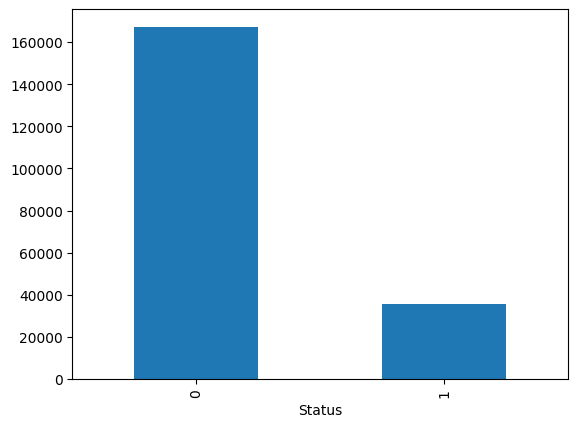

In [11]:
# Check the distribution of Status
train_df['Status'].value_counts().plot(kind='bar')

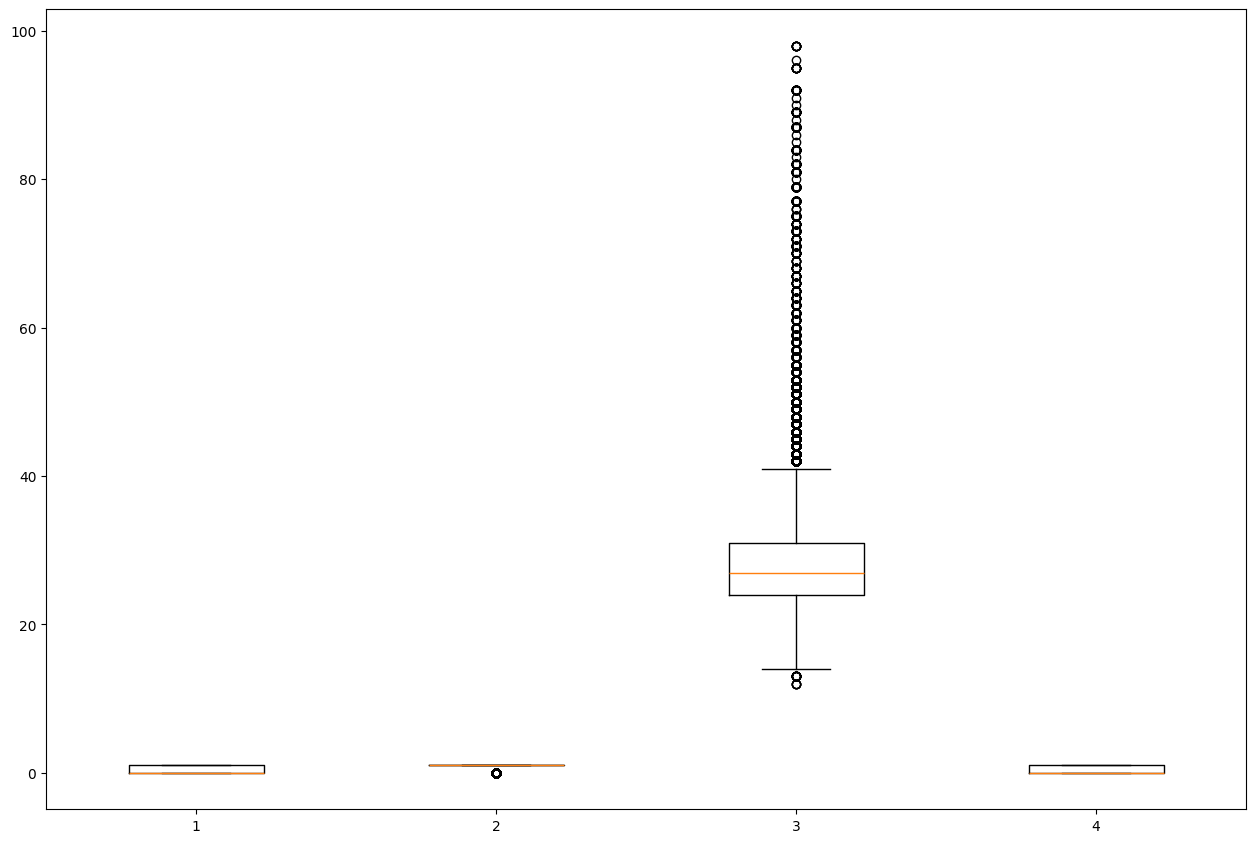

In [12]:
fig = plt.figure(figsize =(12, 8))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(train_df. iloc[:, [1,2,3,4]])
 
# show plot
plt.show()

<Figure size 6400x6400 with 0 Axes>

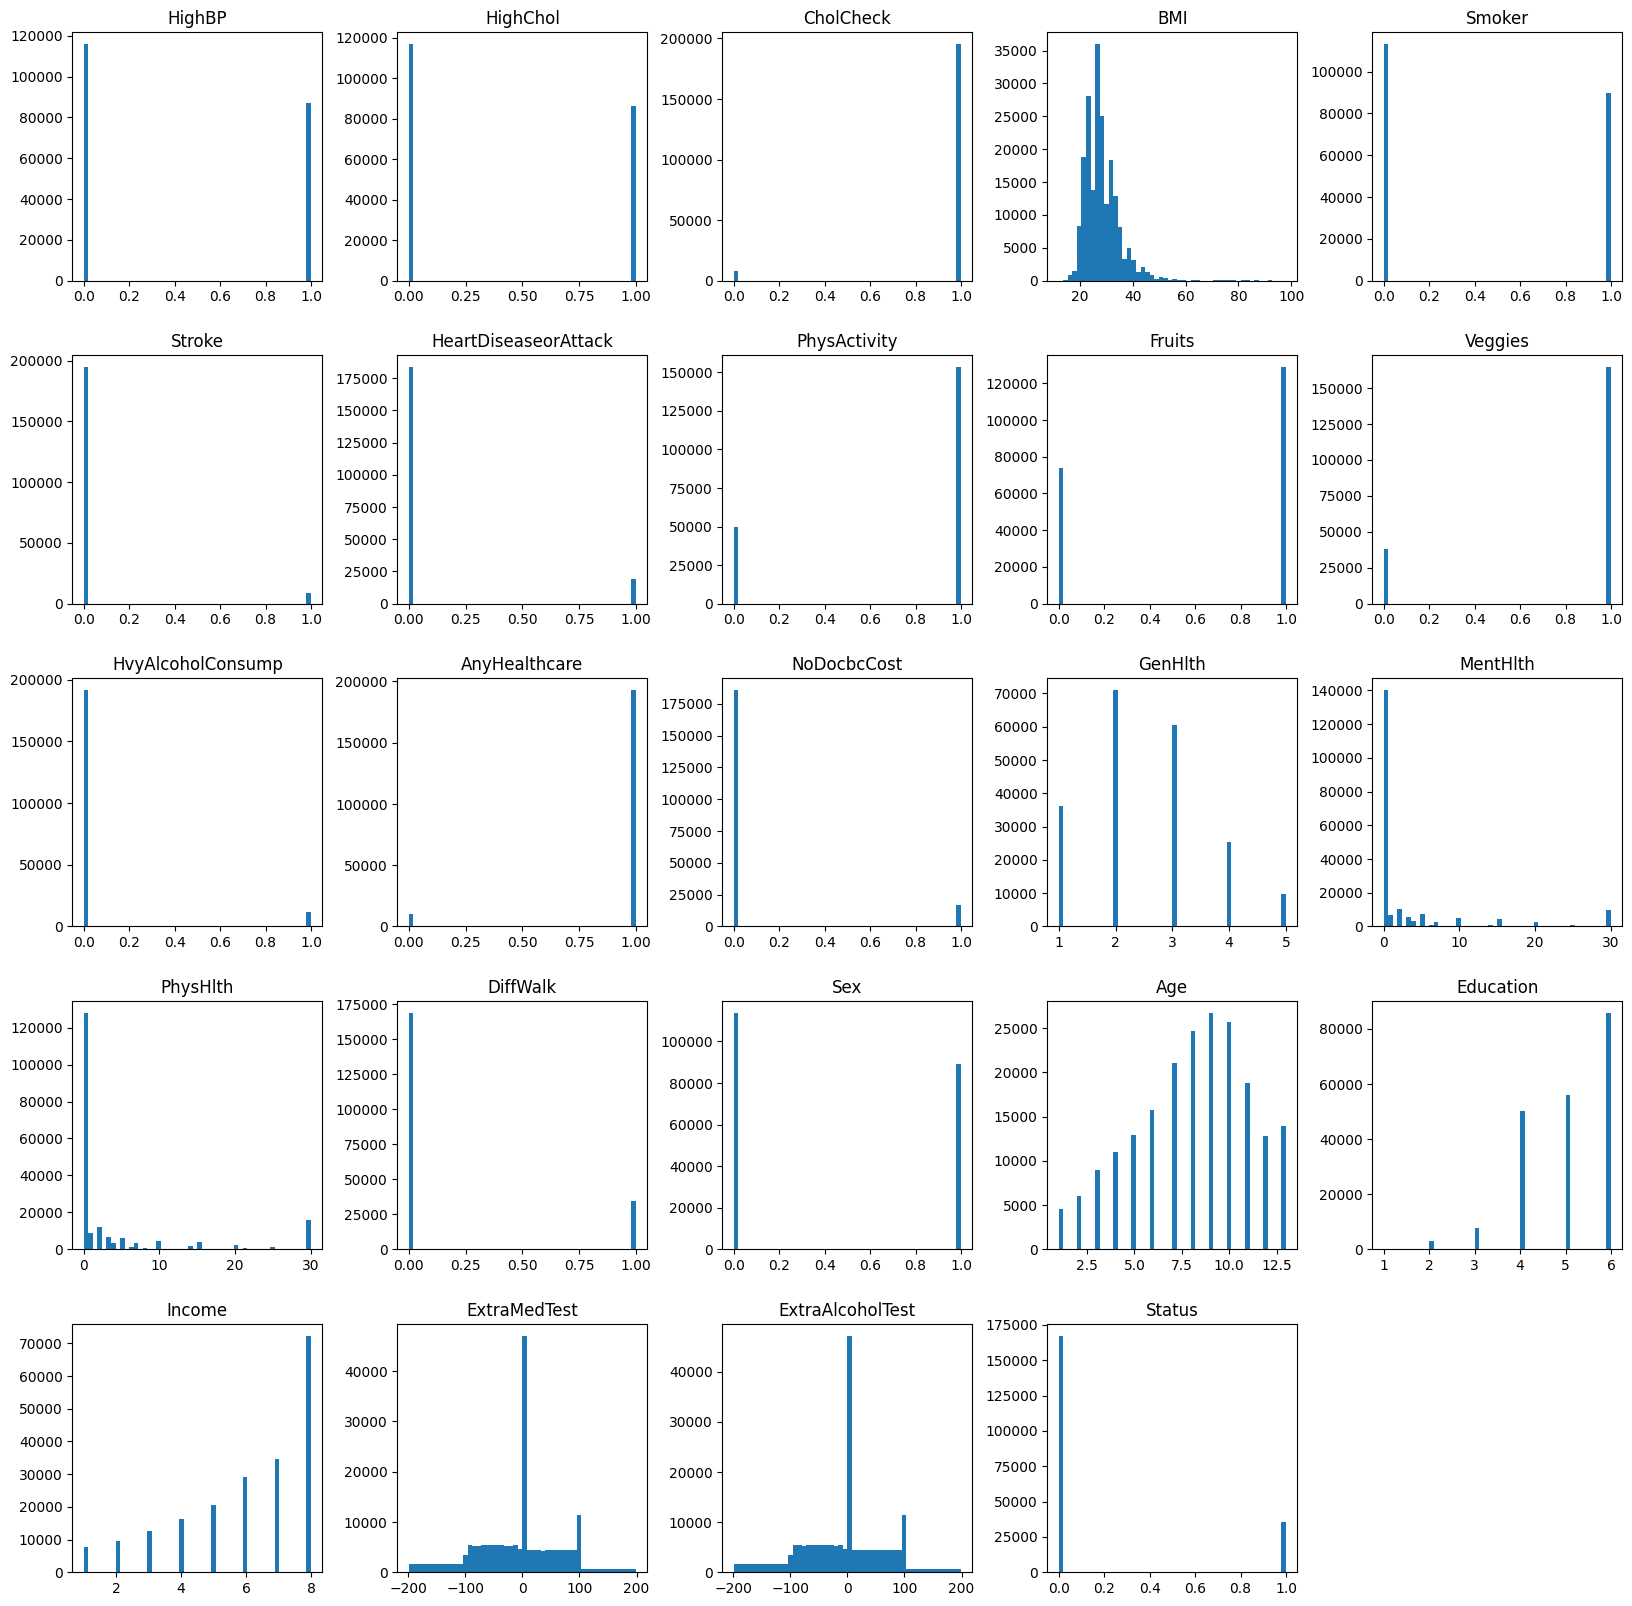

In [13]:
plt.figure(figsize=(40, 40), dpi=160)
train_df.hist(figsize=(20, 20), bins=50, grid=False)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix of Data')

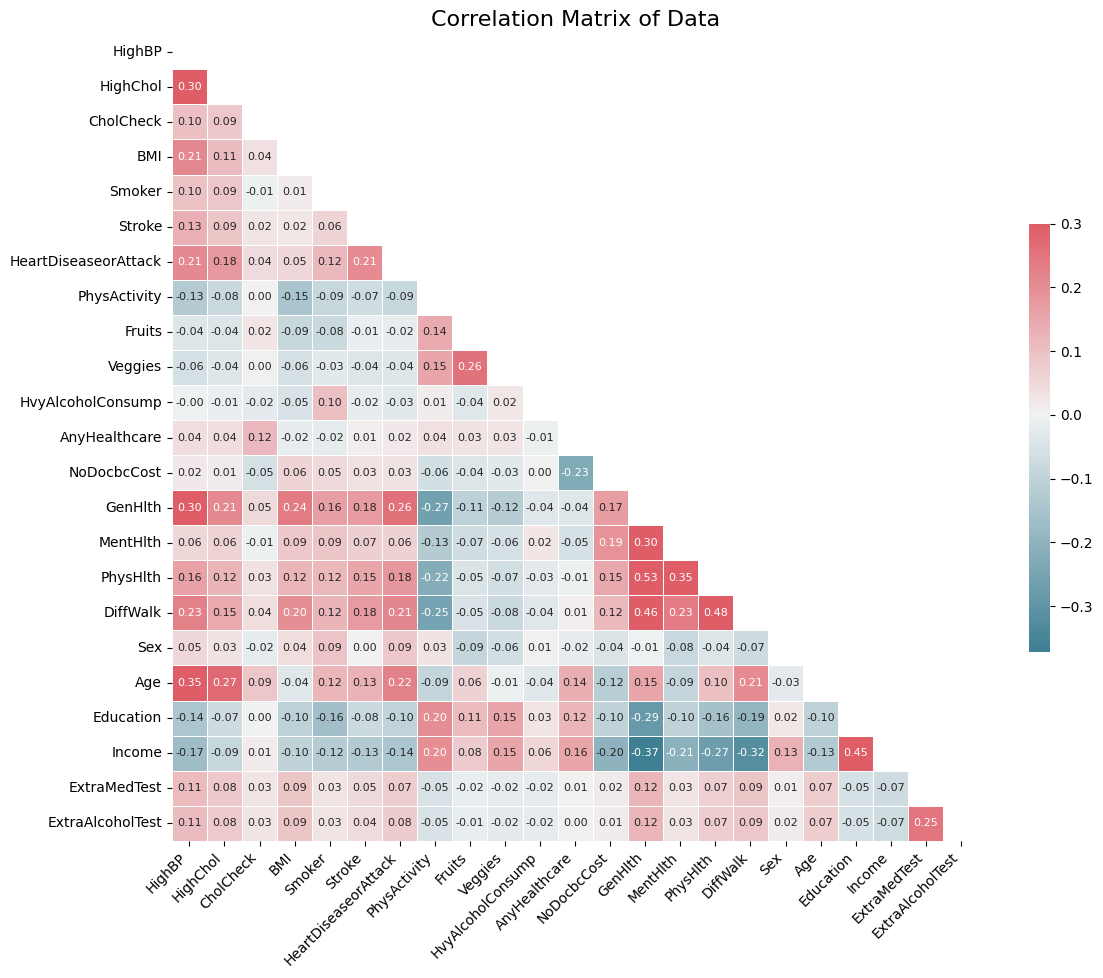

In [14]:
# Calculate the correlation matrix
corr = train_df.drop('Status', axis=1).corr()

# Create a mask to display only one half of the matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"size": 8})

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')
# Rotate the y-axis labels
plt.yticks(rotation=0)

# Improve layout
plt.tight_layout()

# Set the title
ax.set_title('Correlation Matrix of Data', fontsize=16)

In [15]:
# Filter for correlation value greater than 0.4
sort = corr.abs().unstack()
sort = sort.sort_values(kind = 'quicksort', ascending = False)
sort[(sort > .4) & (sort < 1)]

GenHlth    PhysHlth     0.526790
PhysHlth   GenHlth      0.526790
DiffWalk   PhysHlth     0.478336
PhysHlth   DiffWalk     0.478336
DiffWalk   GenHlth      0.458308
GenHlth    DiffWalk     0.458308
Income     Education    0.449625
Education  Income       0.449625
dtype: float64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

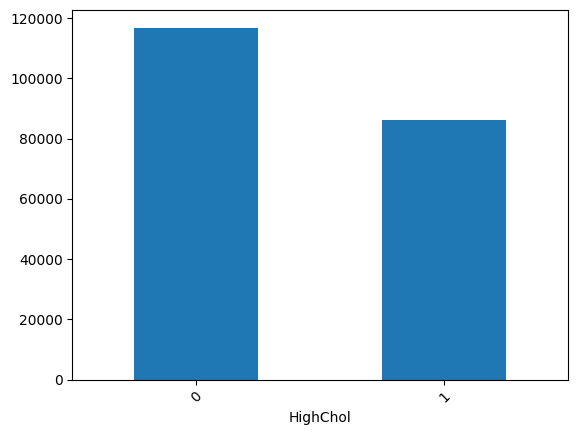

In [ ]:
train_df['HighChol'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

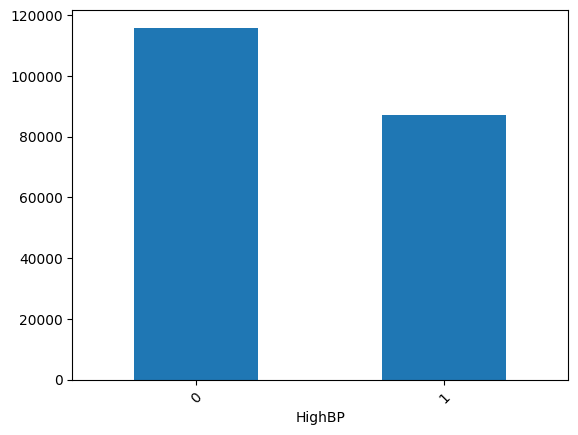

In [17]:
train_df['HighBP'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '9'),
  Text(1, 0, '10'),
  Text(2, 0, '8'),
  Text(3, 0, '7'),
  Text(4, 0, '11'),
  Text(5, 0, '6'),
  Text(6, 0, '13'),
  Text(7, 0, '5'),
  Text(8, 0, '12'),
  Text(9, 0, '4'),
  Text(10, 0, '3'),
  Text(11, 0, '2'),
  Text(12, 0, '1')])

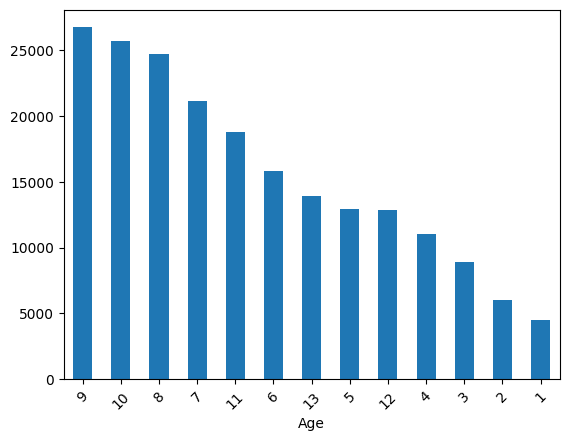

In [18]:
train_df['Age'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)

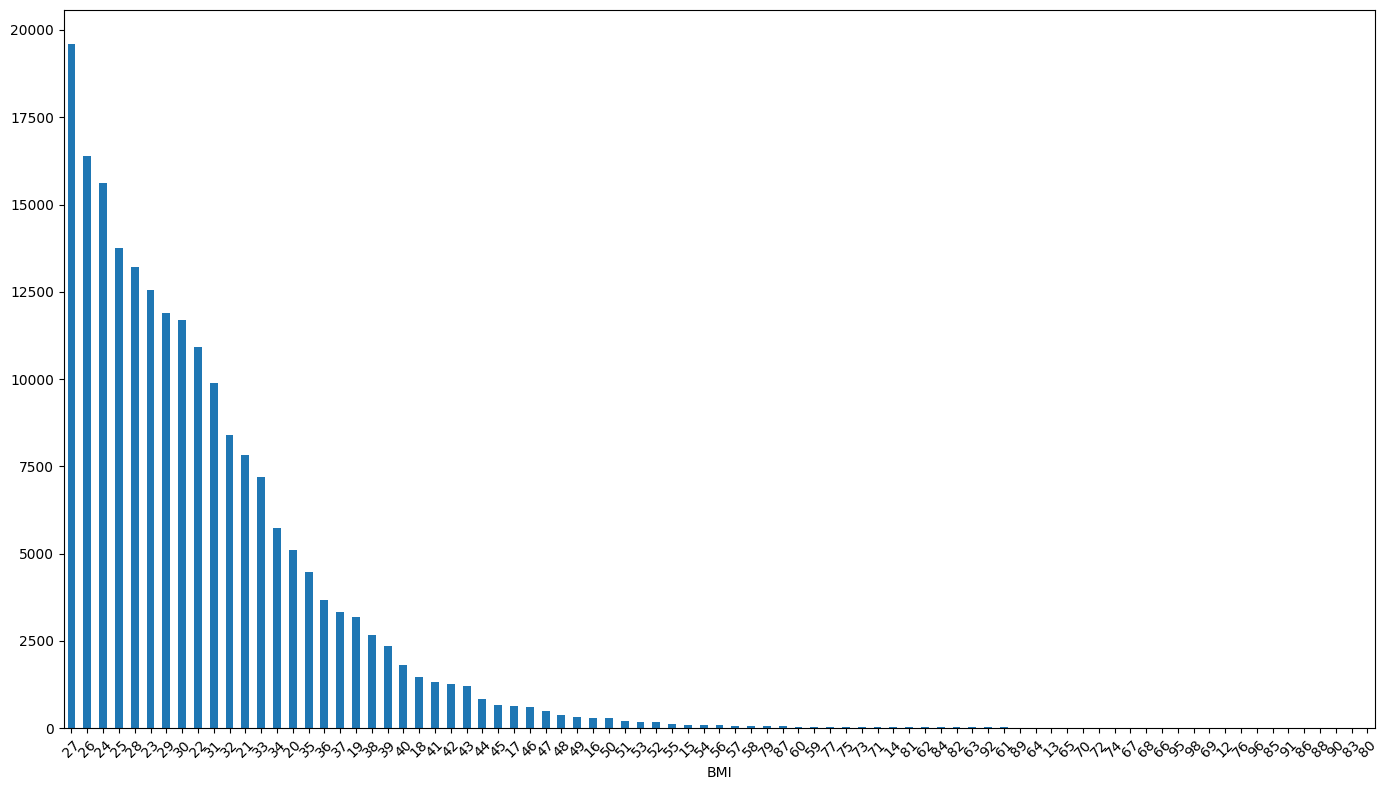

In [19]:
plt.figure(figsize=(14, 8), dpi=100)
train_df['BMI'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.tight_layout()

<Axes: xlabel='Status'>

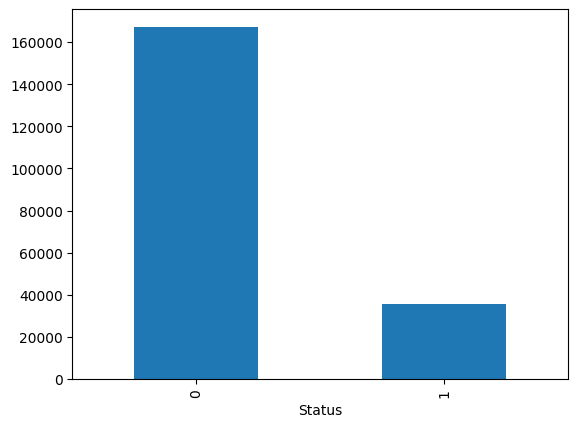

In [20]:
# Check the distribution of Status
train_df['Status'].value_counts().plot(kind='bar')

<Axes: xlabel='GenHlth'>

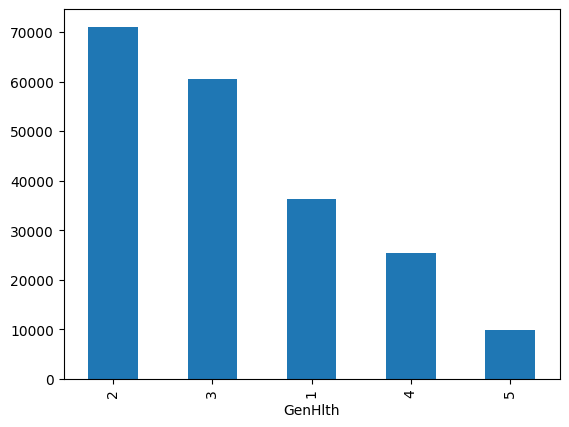

In [21]:
train_df['GenHlth'].value_counts().plot(kind='bar')

<Axes: xlabel='PhysHlth'>

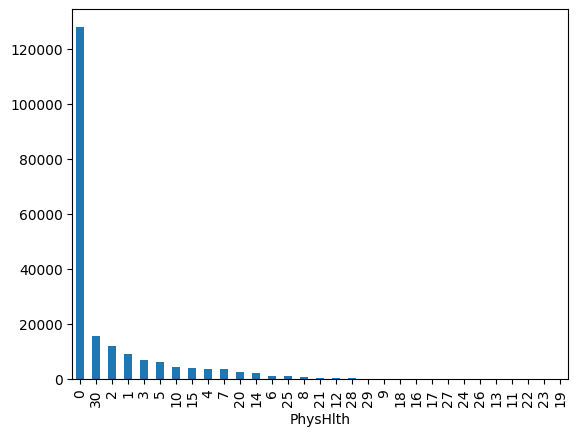

In [22]:
train_df['PhysHlth'].value_counts().plot(kind='bar')

<Axes: xlabel='DiffWalk'>

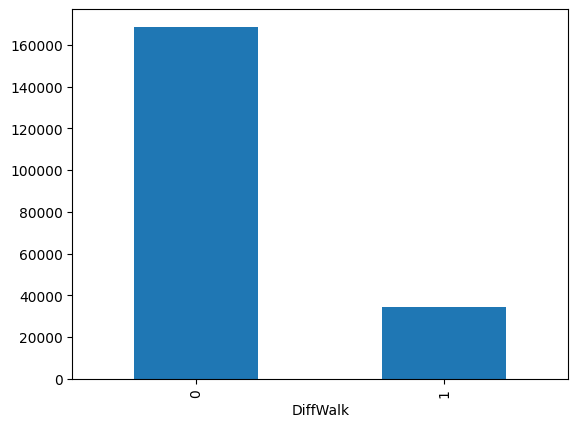

In [23]:
train_df['DiffWalk'].value_counts().plot(kind='bar')

<Axes: xlabel='HighChol', ylabel='Age'>

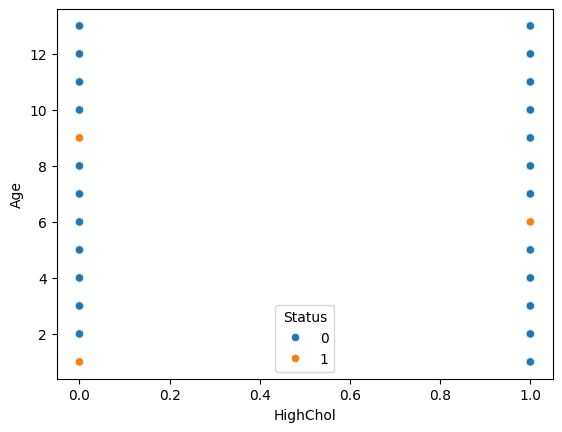

In [24]:
sns.scatterplot(x='HighChol', y='Age', data=train_df, hue='Status')

<Axes: xlabel='HighBP', ylabel='Age'>

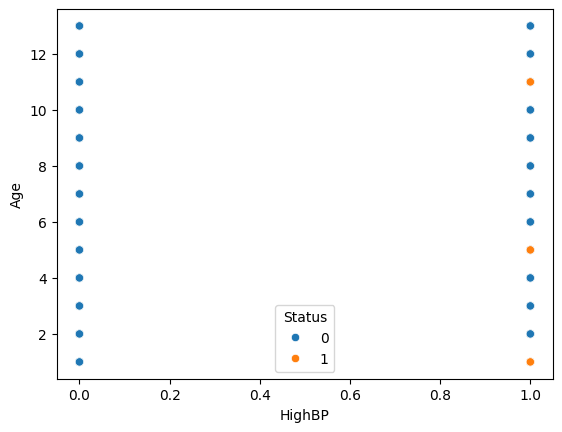

In [25]:
sns.scatterplot(x='HighBP', y='Age', data=train_df, hue='Status')

<Axes: xlabel='PhysHlth', ylabel='BMI'>

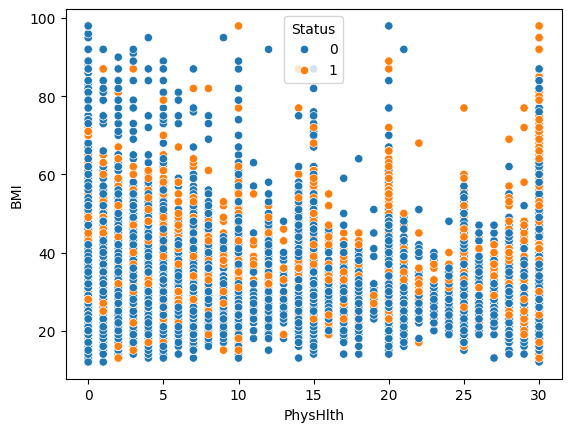

In [26]:
sns.scatterplot(x='PhysHlth', y='BMI', data=train_df, hue='Status')

<Axes: xlabel='GenHlth', ylabel='BMI'>

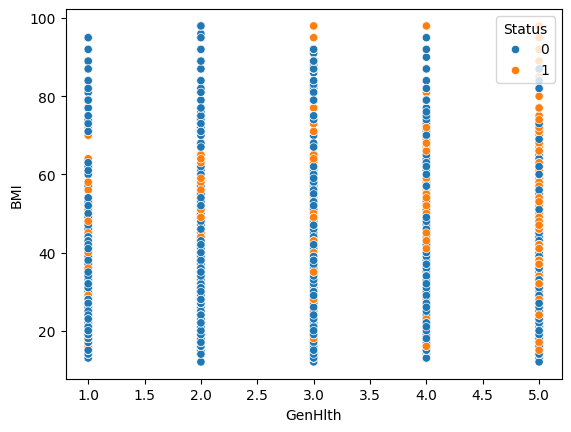

In [27]:
sns.scatterplot(x='GenHlth', y='BMI', data=train_df, hue='Status')

<Axes: xlabel='GenHlth', ylabel='PhysHlth'>

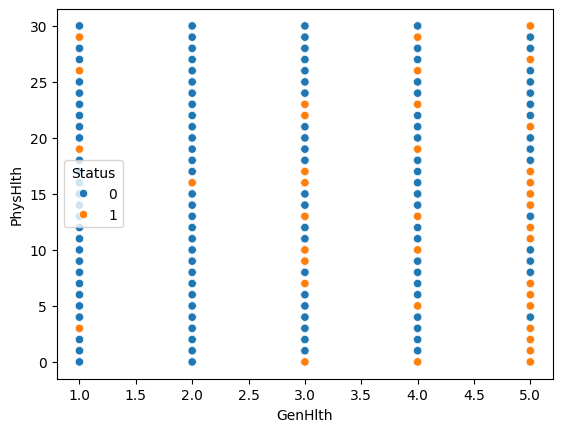

In [28]:
sns.scatterplot(x='GenHlth', y='PhysHlth', data=train_df, hue='Status')

<Axes: xlabel='DiffWalk', ylabel='GenHlth'>

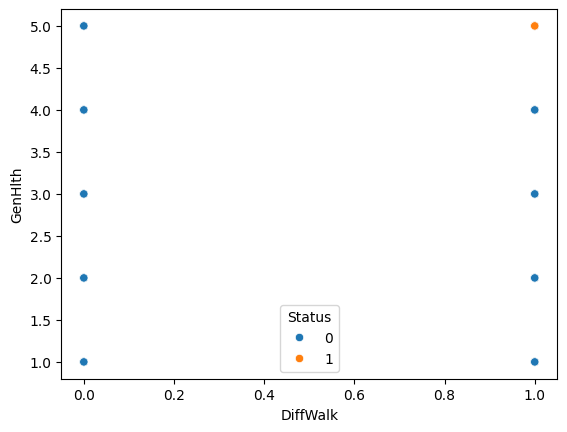

In [29]:
sns.scatterplot(x='DiffWalk', y='GenHlth', data=train_df, hue='Status')

<Axes: xlabel='DiffWalk', ylabel='PhysHlth'>

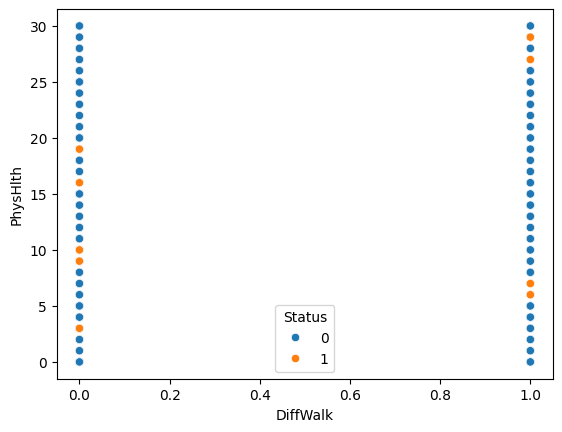

In [33]:
sns.scatterplot(x='DiffWalk', y='PhysHlth', data=train_df, hue='Status')

## 5. Feature Engineering

### 5.1. Utility functions

In [49]:
def train_and_predict(model, x_train, y_train, x_test):
    model.fit(x_train, y_train)
    return model.predict(x_test), model.predict_proba(x_test)[:, 1]

def metric_accuracy(y_test, y_pred):
    print("Validation Accuracy:", accuracy_score(y_test, y_pred))

def metric_classification_report(y_test, y_pred):
    print("Classification Report:\n", classification_report(y_test, y_pred))

def metric_cross_val_score(model, x_train, y_train):
    cv_scores = cross_val_score(model, x_train, y_train, cv=5)
    print("Cross-validation scores mean:", cv_scores.mean())

def metric_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,
                annot=True,
                fmt='g',
                xticklabels=['Positive Diabetes','Negative Diabetes'],
                yticklabels=['Positive Diabetes','Negative Diabetes'])
    plt.ylabel('Prediction',fontsize=14)
    plt.xlabel('Actual',fontsize=14)
    plt.title('Confusion Matrix',fontsize=18)

def metric_roc(y_pred, y_pred_prob, y_test):
    model_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.figure(figsize=(12.8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {model_roc_auc:.4f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc='lower right')

def save_predictions(y_pred, predictions_path):
    prediction_df = pd.DataFrame({'Id': test_df['Id'], 'Status': y_pred})
    prediction_df.to_csv(predictions_path, index=False)

### 5.2.  Data Preprocessing

In [50]:
# Extracting x and y axis
x_train = train_df.drop(columns=['Status']) # Drop the target column Status
y_train = train_df['Status'] # Target column

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# SMOTE Oversampling
sm = SMOTE()
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# now the number of sample in both class 1 and class 0 are equal to 334626
print(x_train_sm.shape, y_train_sm.shape)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train_sm, y_train_sm, test_size=0.2, random_state=42)

(334626, 23) (334626,)


## 6. Models

### 6.1. Logistic Regression with Hyperparameter Tuning

6.1.1. Finding the best Hyperparameter

In [58]:
model_log_reg = LogisticRegression()

# choose hyperparameter
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# set up grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model_log_reg, param_grid=grid, n_jobs=-1, cv=rskf, scoring='recall',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# show results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']

stds = grid_result.cv_results_['std_test_score']

params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.887986 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.887301 (0.002185) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.887239 (0.002188) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.887304 (0.002183) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.887301 (0.002185) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.887242 (0.002188) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.887304 (0.002183) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.887299 (0.002186) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.887244 (0.002188) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.887309 (0.002186) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.887316 (0.002183) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.887264 (0.002200) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.887391 (0.002157) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.887311 (0.002146) wi

6.1.2. Solve using the best Hyperparameter

In [52]:
# Best: 0.886250 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

model_log_reg = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')
y_pred_log_reg, y_pred_prob_log_reg = train_and_predict(model_log_reg, x_train, y_train, x_test)

# save the predictions to a CSV file
# save_predictions(y_pred, predictions_path_logistic_regression)

6.1.3. Evaluation

In [53]:
metric_cross_val_score(model_log_reg, x_train, y_train)

Cross-validation scores mean: 0.8911281285020545


In [54]:
metric_accuracy(y_test, y_pred_log_reg)

Validation Accuracy: 0.8899381406329379


In [55]:
metric_classification_report(y_test, y_pred_log_reg)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     33430
           1       0.89      0.89      0.89     33496

    accuracy                           0.89     66926
   macro avg       0.89      0.89      0.89     66926
weighted avg       0.89      0.89      0.89     66926



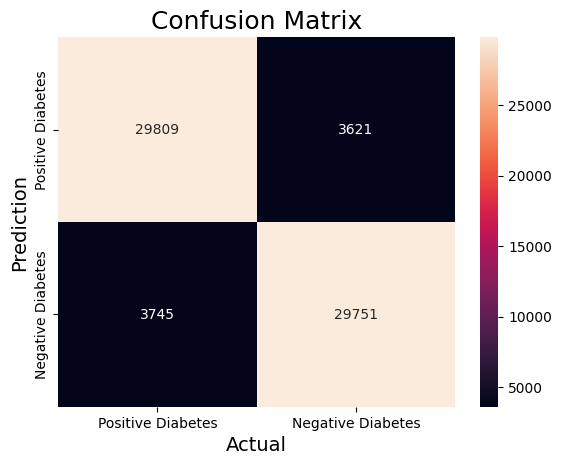

In [56]:
metric_confusion_matrix(y_test, y_pred_log_reg)

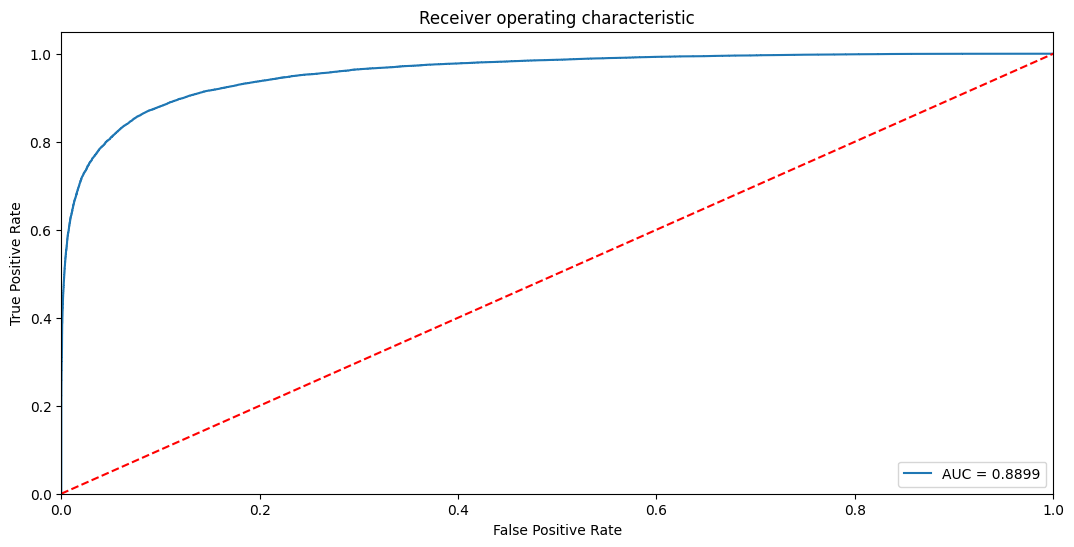

In [57]:
metric_roc(y_pred_log_reg, y_pred_prob_log_reg, y_test)

### 6.2. Decision Tree